<a href="https://colab.research.google.com/github/baba410/1082python/blob/master/for_%E5%85%AB%E6%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2train_test_data.pickle to 2train_test_data (3).pickle


In [0]:
import tensorflow as tf

In [0]:
import pickle

In [0]:
with open('2train_test_data.pickle','rb') as file:
    dic = pickle.load(file)

In [0]:
inputa  = dic['inputa'].astype(np.float32)
inputa2 = dic['inputa2'].astype(np.float32)
inputb  = dic['inputb'].astype(np.float32)
inputb2 = dic['inputb2'].astype(np.float32)
inputc  = dic['inputc'].astype(np.float32)
inputc2 = dic['inputc2'].astype(np.float32)
y_train = dic['y_train'].astype(np.float32)
y_test  = dic['y_test'].astype(np.float32)

In [0]:
dic['inputb'].shape

(8955, 6)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [0]:
y_train_.shape

(8955, 2)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GRU, Embedding, Flatten, concatenate, Input
#Dense for NN, Conv2d Maxpool2d Flatten for CNN , GRU Embedding for RNN , Input concatenate for functional API
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, SpatialDropout1D, Reshape

In [0]:
from tensorflow.keras.layers import LSTM

In [0]:
# build RNN
InputA = Input(shape=(30,))
a = Embedding(10000,128)(InputA)
a = LSTM(128)(a)
a = Dense(25, activation='relu')(a)
a = Dense(25, activation='relu')(a)
a = Dense(25, activation='relu')(a)
a = Dense(25, activation='relu')(a)
a = Dense(25, activation='relu')(a)
a = Dense(25, activation='relu')(a)
a = Model(inputs=InputA , outputs=a)

In [0]:
# build NN
InputB = Input(6,)
b = Dense(100, activation='relu')(InputB)
b = Dense(25, activation='relu')(b)
b = Dense(25, activation='relu')(b)
b = Dense(25, activation='relu')(b)
b = Dense(25, activation='relu')(b)
b = Dense(25, activation='relu')(b)
b = Dense(25, activation='relu')(b)
b = Model(inputs=InputB, outputs=b)

In [0]:
# build CNN
InputC = Input(shape=(48,48,3,))
c = Conv2D(16, (3,3), padding='same', activation = 'relu')(InputC)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(32, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(64, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Conv2D(128, (3,3), padding='same', activation = 'relu')(c)
c = MaxPooling2D(pool_size=(2,2))(c)
c = Flatten()(c)
c = Dense(25, activation='relu')(c)
c = Model(inputs=InputC, outputs=c)

In [0]:
# combine
combined = concatenate([a.output, b.output, c.output])
d = Dropout(0.2)(combined)
d = Dense(10, activation='relu')(combined)
d = Dense(20, activation='relu')(d)
d = Dense(40, activation='relu')(d)
d = Dense(2, activation='softmax')(d)
model = Model(inputs=[InputA, InputB, InputC], outputs=d)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 16)   448         input_3[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 24, 24, 16)   0           conv2d[0][0]                     
____________________________________________________________________________________________

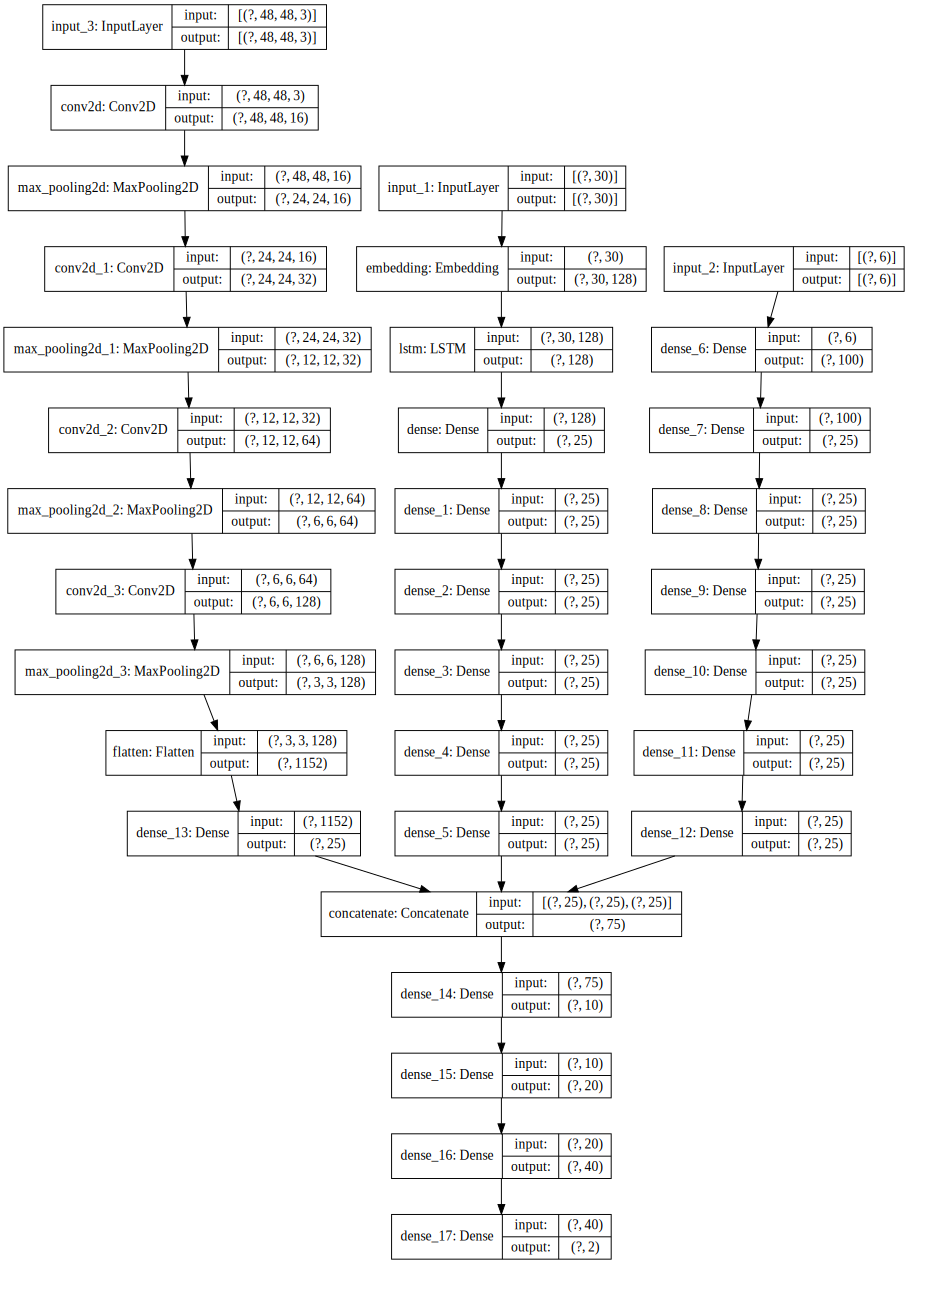

In [0]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model,show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [0]:
mycallback = [tf.keras.callbacks.History()]
history = model.fit([inputa, inputb, inputc], y_train_, batch_size=500, epochs=60,
                    callbacks = mycallback,
          validation_data=(([inputa2, inputb2, inputc2], y_test_)))

Epoch 1/60
18/18 [==============================] - 27s 2s/step - loss: 1.4554 - accuracy: 0.4960 - val_loss: 0.7176 - val_accuracy: 0.4944
Epoch 2/60
18/18 [==============================] - 27s 1s/step - loss: 0.7089 - accuracy: 0.4996 - val_loss: 0.7053 - val_accuracy: 0.5056
Epoch 3/60
18/18 [==============================] - 27s 1s/step - loss: 0.6967 - accuracy: 0.4996 - val_loss: 0.6935 - val_accuracy: 0.5056
Epoch 4/60
18/18 [==============================] - 27s 1s/step - loss: 0.6933 - accuracy: 0.5094 - val_loss: 0.6949 - val_accuracy: 0.5056
Epoch 5/60
18/18 [==============================] - 27s 1s/step - loss: 0.6937 - accuracy: 0.5098 - val_loss: 0.6928 - val_accuracy: 0.5056
Epoch 6/60
18/18 [==============================] - 27s 1s/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6940 - val_accuracy: 0.4944
Epoch 7/60
18/18 [==============================] - 27s 1s/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6940 - val_accuracy: 0.5056
Epoch 8/60
18/18 [==

In [0]:
import matplotlib.pyplot as plt

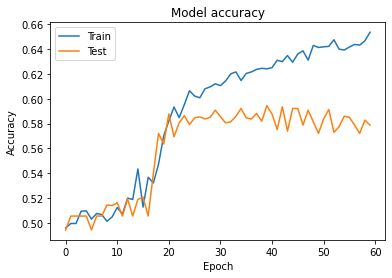

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

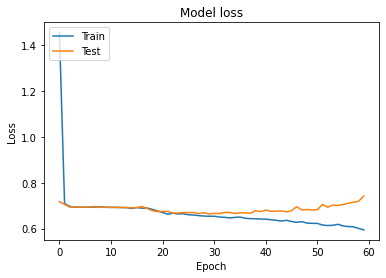

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate([inputa2, inputb2, inputc2], y_test_, verbose=0)
print("正確率為：", score[1])

正確率為： 0.578829824924469


In [0]:
model.predict([inputa2[10:20], inputb2[10:20], inputc2[10:20]])

array([[0.6011807 , 0.39881933],
       [0.41499698, 0.58500296],
       [0.25093013, 0.74906987],
       [0.78290385, 0.21709616],
       [0.75963193, 0.24036805],
       [0.5028762 , 0.4971238 ],
       [0.4682201 , 0.5317799 ],
       [0.30294803, 0.697052  ],
       [0.84175104, 0.15824895],
       [0.01234899, 0.987651  ]], dtype=float32)

In [0]:
list(y_train).count(0)/len(y_train)

0.5128978224455611

In [0]:
model.save('p_2.h5')